# Comparison of microscopic and macroscopic results in terms of the unified trajectory

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
micro_data = pd.read_pickle('../divestdata/P3/micro/unified_trajectory')
macro_data = pd.read_pickle('../divestdata/P3/res/unified_trajectory')
macro_data.index.levels

FrozenList([[1.25], [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0], [0.01, 0.05], [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 

In [3]:
key = [1.25, 0.5, 1.0, 0.05]
level = ['b_d', 'phi', 'tau', 'eps']

tmax = 300

mean = micro_data.xs(level = level, key=key)['mean_trajectory'].unstack('observables')[0:tmax]
sem = micro_data.xs(level = level, key=key)['sem_trajectory'].unstack('observables')[0:tmax]


ma_mean = macro_data.xs(level = level, key=key)['mean_trajectory'].unstack('observables')[0:tmax]
ma_sem = macro_data.xs(level = level, key=key)['sem_trajectory'].unstack('observables')[0:tmax]


for i, df in enumerate([mean, sem, ma_mean, ma_sem]):
    
    columns = df.columns
    new_columns = pd.Index(['$'+col+'$' for col in columns.values], name=columns.name)
    df.columns = new_columns

def plot_var(name, mean, sem, ax, color, style, legend=True):
    
    t = mean.index.values
    m = mean[name].values
    s = sem[name].values
    
    if legend is False:
        name = '__no_label__'
    ln = ax.plot(t, m, style, color=color, label=name)
    ax.fill_between(t, m+s, m-s, alpha=.2, color=color)
    
    return ln

def legend_surrogates(styles, pos, ax):
    
    lns = []
    
    for name, style  in styles.items():
        ln = ax.plot(pos[0], pos[1], style, color='k', alpha=.5, label=name)
        lns += ln
        
    return lns

[<matplotlib.lines.Line2D object at 0x7fd46cc7df98>, <matplotlib.lines.Line2D object at 0x7fd46cc0acf8>, <matplotlib.lines.Line2D object at 0x7fd46cc0ada0>, <matplotlib.lines.Line2D object at 0x7fd46cc14e10>]


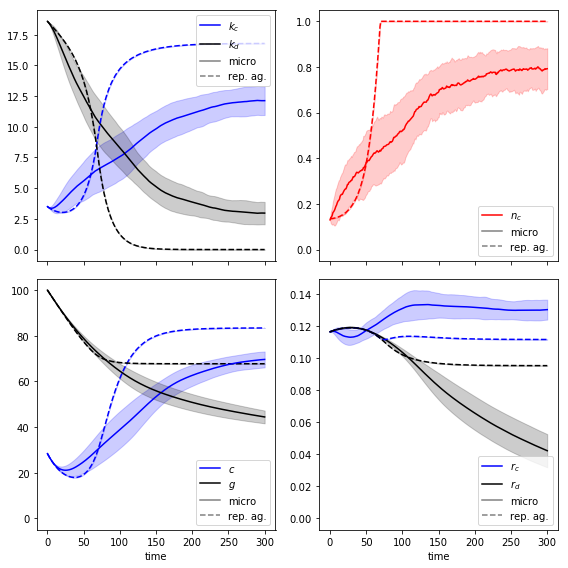

In [4]:
styles = {'micro': '-',
          'rep. ag.': '--'}

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
plot_var('$k_c$', mean, sem, ax1, 'b', '-')
plot_var('$k_d$', mean, sem, ax1, 'k', '-')

plot_var('$k_c$', ma_mean, ma_sem, ax1, 'b', styles['rep. ag.'], legend=False)
plot_var('$k_d$', ma_mean, ma_sem, ax1, 'k', styles['rep. ag.'], legend=False)

ax1.set_xticklabels([])
legend_surrogates(styles, [0, 0], ax1)
plt.legend()

ax2 = fig.add_subplot(222)
plot_var('$n_c$', mean, sem, ax2, 'r', '-')
plot_var('$n_c$', ma_mean, ma_sem, ax2, 'r', styles['rep. ag.'], legend=False)

legend_surrogates(styles, [0, 0], ax2)
ax2.set_xticklabels([])
plt.legend(loc='lower right')

ax3 = fig.add_subplot(223)
#ax3b = ax3.twinx()
plot_var('$c$', ma_mean, ma_sem, ax3, 'b', styles['rep. ag.'], legend=False)
plot_var('$g$', ma_mean, ma_sem, ax3, 'k', styles['rep. ag.'], legend=False)

ln1 = plot_var('$c$', mean, sem, ax3, 'b', '-')
ln2 = plot_var('$g$', mean, sem, ax3, 'k', '-')

lns = legend_surrogates(styles, [0, 0], ax3)

lns = ln1 + ln2 + lns
print(lns)
labs = [ln.get_label() for ln in lns]

plt.legend(lns, labs, loc='lower right')

ax3.set_xlabel('time')

ax4 = fig.add_subplot(224)
plot_var('$r_c$', mean, sem, ax4, 'b', '-')
plot_var('$r_d$', mean, sem, ax4, 'k', '-')

plot_var('$r_c$', ma_mean, ma_sem, ax4, 'b', styles['rep. ag.'], legend=False)
plot_var('$r_d$', ma_mean, ma_sem, ax4, 'k', styles['rep. ag.'], legend=False)

legend_surrogates(styles, [0, 0], ax4)
plt.legend()
ax4.set_xlabel('time')

fig.tight_layout()
plt.savefig('micro_vs_rep.pdf')